# Predição da Localização Subcelular de Proteínas
### Vítor Amorim Fróis

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import hamming_loss
from sklearn.preprocessing import StandardScaler

# Rede Neural
Vamos criar uma classe `SimpleNN` para ambos casos. A classe irá possuir métodos para treinar uma rede sobre um conjunto de treinamento especificado

In [217]:
import os
os.environ["KERAS_BACKEND"] = "jax"
import keras

class SimpleNN:
    def __init__(self, input_size: int, output_size: int):
        self.model = keras.Sequential(
            [
                keras.layers.Input(shape=(input_size,)),
                keras.layers.Dense(128, activation="sigmoid"),
                keras.layers.Dense(output_size, activation="sigmoid"),
            ]
        )
    def compile(self):
        self.model.compile(
            loss=keras.losses.BinaryCrossentropy(),
            optimizer=keras.optimizers.RMSprop(),
            metrics=['binary_crossentropy']
        )

    def fit(self, X, y, batch_size: int = 10, epochs: int = 10):
        return self.model.fit(
            X,
            y,
            batch_size=batch_size,
            epochs=epochs,
            validation_split=0.15,
            callbacks=[keras.callbacks.EarlyStopping(patience=2)],
        )

    def evaluate(self, X, y):
        return self.model.evaluate(X, y, verbose=0)

    def predict(self, X):
        return self.model.predict(X)

# Vírus
O conjunto de dados possui seis localizações subcelulares: Proteínas do Capsídeo Viral, Proteínas da Membrana Celular do Hospedeiro, Proteínas do Retículo Endoplasmático do Hospedeiro, Proteínas do Citoplasma do Hospedeiro, Proteínas do Núcleo do Hospedeiro e Proteínas Secretadas. 

### Leitura do Dataset

In [231]:
virus_df = pd.read_csv('data/Virus_Dataset_Term_Frequency.tsv', delimiter='\t')
targets = virus_df.columns[-6:]
features = [i for i in virus_df.columns if i.isdigit()]

### Split treino e teste

In [232]:
X = virus_df[features]
y = virus_df[targets]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.7)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print(X_test.shape[0], "test samples")
print(X_train.shape[0], "train samples")

X_train shape: (144, 362)
y_train shape: (144, 6)
62 test samples
144 train samples


### Normalização dos dados

In [233]:
scaler = StandardScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

### Instancia e treina rede neural

In [234]:
model = SimpleNN(len(features), len(targets))
model.compile()
history = model.fit(X_train, y_train, epochs=50)

Epoch 1/50


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - binary_crossentropy: 0.5925 - loss: 0.5925 - val_binary_crossentropy: 0.4620 - val_loss: 0.4620
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_crossentropy: 0.4171 - loss: 0.4171 - val_binary_crossentropy: 0.4192 - val_loss: 0.4192
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_crossentropy: 0.3477 - loss: 0.3477 - val_binary_crossentropy: 0.3966 - val_loss: 0.3966
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_crossentropy: 0.3153 - loss: 0.3153 - val_binary_crossentropy: 0.3765 - val_loss: 0.3765
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_crossentropy: 0.2798 - loss: 0.2798 - val_binary_crossentropy: 0.3615 - val_loss: 0.3615
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_crossentropy: 0.2669 - loss: 0.2669 - val_binary_crossentropy: 0.3506 - val_loss: 0.3506
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_crossentropy: 0.2308 - loss: 0.2308 - val_binary_crossentropy: 

Text(0.5, 1.0, 'Loss evolution')

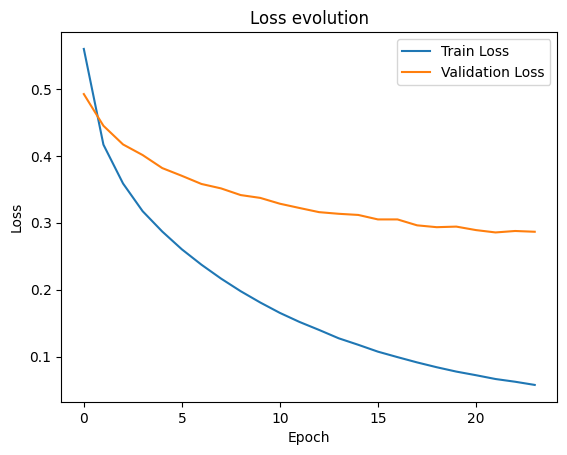

In [222]:
plt.plot(history.history['binary_crossentropy'])
plt.plot(history.history['val_binary_crossentropy'])
plt.legend(['Train Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss evolution')
plt.ylim(0, 1)

### Testes da rede

In [223]:
predictions = np.array(model.predict(X_test))

threshold = 0.5
predictions[predictions >= threshold] = 1
predictions[predictions < threshold] = 0

print(f'Hamming Loss: {hamming_loss(predictions, y_test)}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Hamming Loss: 0.06989247311827956


# Plantas
O conjunto de dados possui doze localizações subcelulares: CellMembraneProteins, CellWallProteins, ChloroplastProteins, CytoplasmProteins, EndoplasmicReticulumProteins, ExtracellProteins, GolgiApparatusProteins, MitochondrionProteins, NucleusProteins, PeroxisomeProteins, PlastidProteins e VacuoleProteins.

### Leitura do Dataset

In [224]:
plants_df = pd.read_csv('data/Plants_Dataset_Term_Frequency.tsv', delimiter='\t')
targets = plants_df.columns[-12:]
features = [i for i in plants_df.columns if i.isdigit()]

### Split treino e teste

In [225]:
X = plants_df[features]
y = plants_df[targets]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.7)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print(X_test.shape[0], "test samples")
print(X_train.shape[0], "train samples")

X_train shape: (676, 1830)
y_train shape: (676, 12)
290 test samples
676 train samples


### Normalização dos dados

In [226]:
scaler = StandardScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

### Instancia e treina rede neural

In [227]:
model = SimpleNN(len(features), len(targets))
model.compile()
model.fit(X_train, y_train, epochs=50)

Epoch 1/50


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - binary_crossentropy: 0.4284 - loss: 0.4284 - val_binary_crossentropy: 0.2380 - val_loss: 0.2380
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_crossentropy: 0.1849 - loss: 0.1849 - val_binary_crossentropy: 0.1975 - val_loss: 0.1975
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_crossentropy: 0.1418 - loss: 0.1418 - val_binary_crossentropy: 0.1705 - val_loss: 0.1705
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_crossentropy: 0.1058 - loss: 0.1058 - val_binary_crossentropy: 0.1495 - val_loss: 0.1495
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_crossentropy: 0.0865 - loss: 0.0865 - val_binary_crossentropy: 0.1332 - val_loss: 0.1332
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_crossentropy: 0.0644 - loss: 0.0644 - val_binary_crossentropy: 0.1206 - val_loss: 0.1206
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_crossentropy: 0.0563 - loss: 0.0563 - val_binary_crossentropy: 

### Testes da rede

In [228]:
predictions = np.array(model.predict(X_test))

threshold = 0.5
predictions[predictions >= threshold] = 1
predictions[predictions < threshold] = 0

print(f'Hamming Loss: {hamming_loss(predictions, y_test)}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Hamming Loss: 0.03477011494252873


(0.0, 1.0)

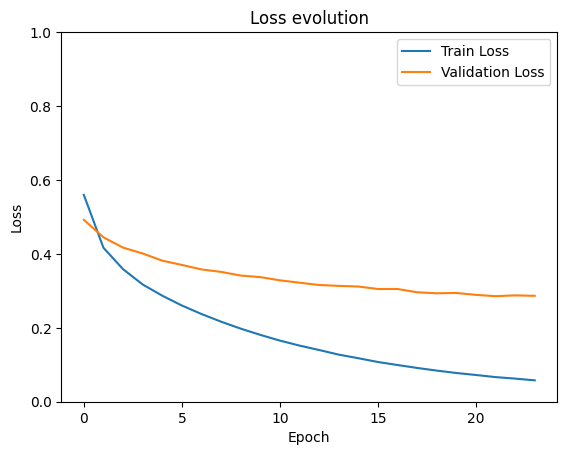

In [230]:
plt.plot(history.history['binary_crossentropy'])
plt.plot(history.history['val_binary_crossentropy'])
plt.legend(['Train Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss evolution')
plt.ylim(0, 1)